# Imports

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Results

## Load Data

In [33]:
results = pd.read_csv('./datasets/results.csv')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


## Results Dataset

In [34]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47379 entries, 0 to 47378
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        47379 non-null  object 
 1   home_team   47354 non-null  object 
 2   away_team   47354 non-null  object 
 3   home_score  47295 non-null  float64
 4   away_score  47295 non-null  float64
 5   tournament  47379 non-null  object 
 6   city        47379 non-null  object 
 7   country     47379 non-null  object 
 8   neutral     47379 non-null  bool   
dtypes: bool(1), float64(2), object(6)
memory usage: 2.9+ MB


In [35]:
america_cup_2024_countries = ['Argentina', 'Peru', 'Chile', 'Canada', 'Mexico', 
                              'Ecuador', 'Venezuela', 'Jamaica', 'United States', 
                              'Uruguay', 'Panama', 'Bolivia', 'Brazil', 'Colombia', 
                              'Costa Rica', 'Paraguay']
results = results[results['home_team'].isin(america_cup_2024_countries) & results['away_team'].isin(america_cup_2024_countries)]
results

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
41,1885-11-28,United States,Canada,0.0,1.0,Friendly,Newark,United States,False
48,1886-11-25,United States,Canada,3.0,2.0,Friendly,Newark,United States,False
145,1902-07-20,Uruguay,Argentina,0.0,6.0,Friendly,Montevideo,Uruguay,False
155,1903-09-13,Argentina,Uruguay,2.0,3.0,Friendly,Buenos Aires,Argentina,False
179,1905-08-15,Argentina,Uruguay,0.0,0.0,Copa Lipton,Buenos Aires,Argentina,False
...,...,...,...,...,...,...,...,...,...
47355,2024-06-30,Jamaica,Venezuela,NaN,NaN,Copa América,Austin,United States,True
47358,2024-07-01,United States,Uruguay,NaN,NaN,Copa América,Kansas City,United States,False
47359,2024-07-01,Bolivia,Panama,NaN,NaN,Copa América,Orlando,United States,True
47362,2024-07-02,Brazil,Colombia,NaN,NaN,Copa América,Santa Clara,United States,True


In [36]:
from itertools import permutations
combinations = list(permutations(america_cup_2024_countries, 2))
comb_df = pd.DataFrame(combinations, columns=['home_team', 'away_team'])
merged_df = comb_df.merge(results[['home_team', 'away_team']], 
                          on=['home_team', 'away_team'], 
                          how='left', 
                          indicator=True)

missing_combinations = merged_df[merged_df['_merge'] == 'left_only']
print("Combinaciones faltantes:")
print(missing_combinations)


Combinaciones faltantes:
       home_team      away_team     _merge
836        Chile        Jamaica  left_only
1018      Canada      Argentina  left_only
1038      Canada      Venezuela  left_only
1070      Canada        Bolivia  left_only
1446     Ecuador         Canada  left_only
1638   Venezuela  United States  left_only
1728     Jamaica      Argentina  left_only
1759     Jamaica        Ecuador  left_only
1791     Jamaica        Bolivia  left_only
1792     Jamaica         Brazil  left_only
2194     Uruguay         Canada  left_only
2353      Panama      Argentina  left_only
2358      Panama          Chile  left_only
2405      Panama         Brazil  left_only
2506     Bolivia         Canada  left_only
3376  Costa Rica        Bolivia  left_only
3480    Paraguay         Canada  left_only


In [37]:
#get the rows that are between 2024-06-18 and 2000-01-01
results['date'] = pd.to_datetime(results['date'])
results = results[(results['date'] >= '2018-01-01') & (results['date'] <= '2024-06-18')]
results


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
41365,2018-03-27,United States,Paraguay,1.0,0.0,Friendly,Cary,United States,False
41392,2018-05-28,United States,Bolivia,3.0,0.0,Friendly,Chester,United States,False
41577,2018-06-22,Brazil,Costa Rica,2.0,0.0,FIFA World Cup,Saint Petersburg,Russia,True
41606,2018-07-02,Brazil,Mexico,2.0,0.0,FIFA World Cup,Samara,Russia,True
41678,2018-09-07,Ecuador,Jamaica,2.0,0.0,Friendly,Harrison,United States,True
...,...,...,...,...,...,...,...,...,...
47234,2024-06-11,Chile,Paraguay,3.0,0.0,Friendly,Santiago,Chile,False
47278,2024-06-12,Ecuador,Bolivia,3.0,1.0,Friendly,Chester,United States,True
47279,2024-06-12,United States,Brazil,1.0,1.0,Friendly,Orlando,United States,False
47286,2024-06-15,Colombia,Bolivia,3.0,0.0,Friendly,Denver,United States,True


In [38]:
#change the float values to int
results['home_score'] = results['home_score'].astype(int)
results['away_score'] = results['away_score'].astype(int)
results.head()


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
41365,2018-03-27,United States,Paraguay,1,0,Friendly,Cary,United States,False
41392,2018-05-28,United States,Bolivia,3,0,Friendly,Chester,United States,False
41577,2018-06-22,Brazil,Costa Rica,2,0,FIFA World Cup,Saint Petersburg,Russia,True
41606,2018-07-02,Brazil,Mexico,2,0,FIFA World Cup,Samara,Russia,True
41678,2018-09-07,Ecuador,Jamaica,2,0,Friendly,Harrison,United States,True


In [39]:
results["date"] = pd.to_datetime(results["date"])
results


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
41365,2018-03-27,United States,Paraguay,1,0,Friendly,Cary,United States,False
41392,2018-05-28,United States,Bolivia,3,0,Friendly,Chester,United States,False
41577,2018-06-22,Brazil,Costa Rica,2,0,FIFA World Cup,Saint Petersburg,Russia,True
41606,2018-07-02,Brazil,Mexico,2,0,FIFA World Cup,Samara,Russia,True
41678,2018-09-07,Ecuador,Jamaica,2,0,Friendly,Harrison,United States,True
...,...,...,...,...,...,...,...,...,...
47234,2024-06-11,Chile,Paraguay,3,0,Friendly,Santiago,Chile,False
47278,2024-06-12,Ecuador,Bolivia,3,1,Friendly,Chester,United States,True
47279,2024-06-12,United States,Brazil,1,1,Friendly,Orlando,United States,False
47286,2024-06-15,Colombia,Bolivia,3,0,Friendly,Denver,United States,True


## Data Analysis

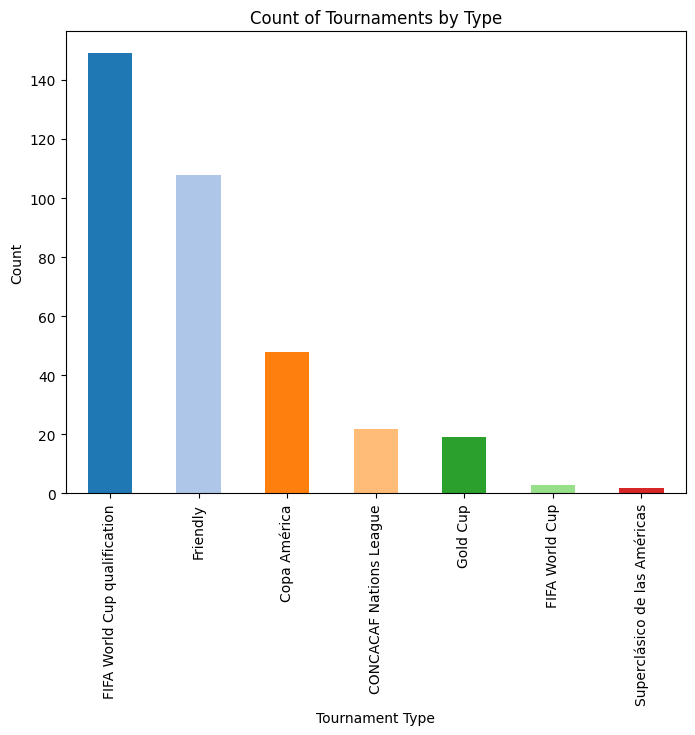

In [40]:
tournament_counts = results['tournament'].value_counts()


plt.figure(figsize=(8, 6))
colors = plt.cm.tab20.colors[:len(tournament_counts)]
tournament_counts.plot(kind='bar', color=colors)
plt.xlabel('Tournament Type')
plt.ylabel('Count')
plt.title('Count of Tournaments by Type')
plt.xticks(rotation=90)
plt.show()



# Rank

In [46]:
rank = pd.read_csv('./datasets/fifa_ranking-2024-04-04.csv')
rank.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
0,83.0,Guatemala,GUA,15.0,0.0,83,CONCACAF,1992-12-31
1,32.0,Zambia,ZAM,38.0,0.0,32,CAF,1992-12-31
2,33.0,Portugal,POR,38.0,0.0,33,UEFA,1992-12-31
3,34.0,Austria,AUT,38.0,0.0,34,UEFA,1992-12-31
4,35.0,Colombia,COL,36.0,0.0,35,CONMEBOL,1992-12-31


In [47]:
rank['country_full'].value_counts()

country_full
Guatemala                332
Liberia                  332
Kenya                    332
Korea DPR                332
Peru                     332
                        ... 
Zaire                     67
Gibraltar                 67
Netherlands Antilles      44
Serbia and Montenegro     43
Czechoslovakia             6
Name: count, Length: 216, dtype: int64

In [48]:
rank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67261 entries, 0 to 67260
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rank             67253 non-null  float64
 1   country_full     67261 non-null  object 
 2   country_abrv     67261 non-null  object 
 3   total_points     67261 non-null  float64
 4   previous_points  67261 non-null  float64
 5   rank_change      67261 non-null  int64  
 6   confederation    67261 non-null  object 
 7   rank_date        67261 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 4.1+ MB


In [49]:
america_cup_2024_countries = ['Argentina', 'Peru', 'Chile', 'Canada', 'Mexico', 
                              'Ecuador', 'Venezuela', 'Jamaica', 'USA', 
                              'Uruguay', 'Panama', 'Bolivia', 'Brazil', 'Colombia', 
                              'Costa Rica', 'Paraguay']
rank = rank[rank['country_full'].isin(america_cup_2024_countries)]
rank

,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
4,35.0,Colombia,COL,36.00,0.00,35,CONMEBOL,1992-12-31
6,37.0,Costa Rica,CRC,35.00,0.00,37,CONCACAF,1992-12-31
16,47.0,Chile,CHI,28.00,0.00,47,CONMEBOL,1992-12-31
29,3.0,Brazil,BRA,56.00,0.00,3,CONMEBOL,1992-12-31
36,10.0,Argentina,ARG,51.00,0.00,10,CONMEBOL,1992-12-31
...,...,...,...,...,...,...,...,...
67139,45.0,Panama,PAN,1475.62,1475.62,1,CONCACAF,2024-04-04
67142,42.0,Chile,CHI,1491.71,1489.82,0,CONMEBOL,2024-04-04
67152,32.0,Peru,PER,1515.82,1512.68,-1,CONMEBOL,2024-04-04
67153,56.0,Paraguay,PAR,1430.73,1430.73,0,CONMEBOL,2024-04-04


In [50]:
#get the rows that are between 2024-06-18 and 2020-01-01
rank = rank[(rank['rank_date'] >= '2018-01-01') & (rank['rank_date'] <= '2024-06-18')]

rank.tail()


,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
67139,45.0,Panama,PAN,1475.62,1475.62,1,CONCACAF,2024-04-04
67142,42.0,Chile,CHI,1491.71,1489.82,0,CONMEBOL,2024-04-04
67152,32.0,Peru,PER,1515.82,1512.68,-1,CONMEBOL,2024-04-04
67153,56.0,Paraguay,PAR,1430.73,1430.73,0,CONMEBOL,2024-04-04
67260,5.0,Brazil,BRA,1788.65,1784.09,0,CONMEBOL,2024-04-04


In [51]:
rank.rank_date = rank.rank_date.apply(lambda x: x.replace("2024-04-04", datetime.today().strftime('%Y-%m-%d')))
rank["rank_date"] = pd.to_datetime(rank["rank_date"])
rank.tail()


,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation,rank_date
67139,45.0,Panama,PAN,1475.62,1475.62,1,CONCACAF,2024-06-19
67142,42.0,Chile,CHI,1491.71,1489.82,0,CONMEBOL,2024-06-19
67152,32.0,Peru,PER,1515.82,1512.68,-1,CONMEBOL,2024-06-19
67153,56.0,Paraguay,PAR,1430.73,1430.73,0,CONMEBOL,2024-06-19
67260,5.0,Brazil,BRA,1788.65,1784.09,0,CONMEBOL,2024-06-19


In [52]:
rank["country_full"] = rank["country_full"].str.replace("USA", "United States")

rank = rank.set_index(['rank_date']).groupby(['country_full'], group_keys=False).resample('D').first().fillna(method='ffill').reset_index()
rank.tail(20)

,rank_date,rank,country_full,country_abrv,total_points,previous_points,rank_change,confederation
37500,2024-05-31,52.0,Venezuela,VEN,1447.20,1447.2,2.0,CONMEBOL
37501,2024-06-01,52.0,Venezuela,VEN,1447.20,1447.2,2.0,CONMEBOL
37502,2024-06-02,52.0,Venezuela,VEN,1447.20,1447.2,2.0,CONMEBOL
37503,2024-06-03,52.0,Venezuela,VEN,1447.20,1447.2,2.0,CONMEBOL
37504,2024-06-04,52.0,Venezuela,VEN,1447.20,1447.2,2.0,CONMEBOL
37505,2024-06-05,52.0,Venezuela,VEN,1447.20,1447.2,2.0,CONMEBOL
37506,2024-06-06,52.0,Venezuela,VEN,1447.20,1447.2,2.0,CONMEBOL
37507,2024-06-07,52.0,Venezuela,VEN,1447.20,1447.2,2.0,CONMEBOL
37508,2024-06-08,52.0,Venezuela,VEN,1447.20,1447.2,2.0,CONMEBOL
37509,2024-06-09,52.0,Venezuela,VEN,1447.20,1447.2,2.0,CONMEBOL


In [53]:
df_ranked = results.merge(rank[["country_full", "total_points", "previous_points", "rank", "rank_change", "rank_date"]], left_on=["date", "home_team"], right_on=["rank_date", "country_full"]).drop(["rank_date", "country_full"], axis=1)
df_ranked = df_ranked.merge(rank[["country_full", "total_points", "previous_points", "rank", "rank_change", "rank_date"]], left_on=["date", "away_team"], right_on=["rank_date", "country_full"], suffixes=("_home", "_away")).drop(["rank_date", "country_full"], axis=1)


In [54]:
df_ranked

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,total_points_home,previous_points_home,rank_home,rank_change_home,total_points_away,previous_points_away,rank_away,rank_change_away
0,2018-03-27,United States,Paraguay,1,0,Friendly,Cary,United States,False,876.00,871.00,25.0,1.0,816.00,812.00,30.0,0.0
1,2018-05-28,United States,Bolivia,3,0,Friendly,Chester,United States,False,880.00,880.00,24.0,0.0,548.00,548.00,57.0,0.0
2,2018-06-22,Brazil,Costa Rica,2,0,FIFA World Cup,Saint Petersburg,Russia,True,1431.00,1384.00,2.0,0.0,884.00,858.00,23.0,-2.0
3,2018-07-02,Brazil,Mexico,2,0,FIFA World Cup,Samara,Russia,True,2160.00,2151.00,4.0,1.0,2041.00,1996.00,10.0,-5.0
4,2018-09-07,Ecuador,Jamaica,2,0,Friendly,Harrison,United States,True,1376.00,1376.00,60.0,0.0,1400.00,1400.00,54.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,2024-06-11,Chile,Paraguay,3,0,Friendly,Santiago,Chile,False,1489.82,1489.82,42.0,2.0,1430.73,1430.73,56.0,3.0
347,2024-06-12,Ecuador,Bolivia,3,1,Friendly,Chester,United States,True,1519.20,1519.20,31.0,-1.0,1284.55,1284.55,86.0,1.0
348,2024-06-12,United States,Brazil,1,1,Friendly,Orlando,United States,False,1661.70,1665.27,13.0,1.0,1784.09,1784.09,5.0,0.0
349,2024-06-15,Colombia,Bolivia,3,0,Friendly,Denver,United States,True,1655.29,1655.29,14.0,0.0,1284.55,1284.55,86.0,1.0


In [55]:
import os

folder_name = "created"
datasets_folder = "./datasets"

new_folder_path = os.path.join(datasets_folder, folder_name)
os.makedirs(new_folder_path, exist_ok=True)

df_ranked.to_csv('./datasets/created/rank_copa_america.csv',index=False)


In [56]:
def result_finder(home, away):
    if home > away:
        return "Home"
    if home < away:
        return "Away"
    else:
        return "Draw"

results["result"] = results.apply(lambda x: result_finder(x["home_score"], x["away_score"]), axis=1)

In [57]:
results[results.tournament  =="Copa América"].head(36).result.value_counts()


result
Home    15
Draw    11
Away    10
Name: count, dtype: int64

In [58]:
results.to_csv("datasets/created/copa_america_countries_results.csv", index=False)
